# Analysis of Air Quality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
warnings.warn('ignore')

# Reading data

In [2]:
data = pd.read_excel('dataset.xlsx')

In [3]:
data.shape

(744, 11)

In [4]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,55,2015-01-05,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN
1,55,2015-01-08,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN
2,55,2015-01-13,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN
3,55,2015-01-16,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0
4,55,2015-01-21,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0


In [5]:
df=data.copy()
del df['Stn Code']
del df['Agency']
del df['State']
del df['Location of Monitoring Station']
del df['City/Town/Village/Area']
df.head()

,Sampling Date,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,2015-01-05,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN
1,2015-01-08,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN
2,2015-01-13,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN
3,2015-01-16,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0
4,2015-01-21,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0


C:\Users\GUNJAN\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


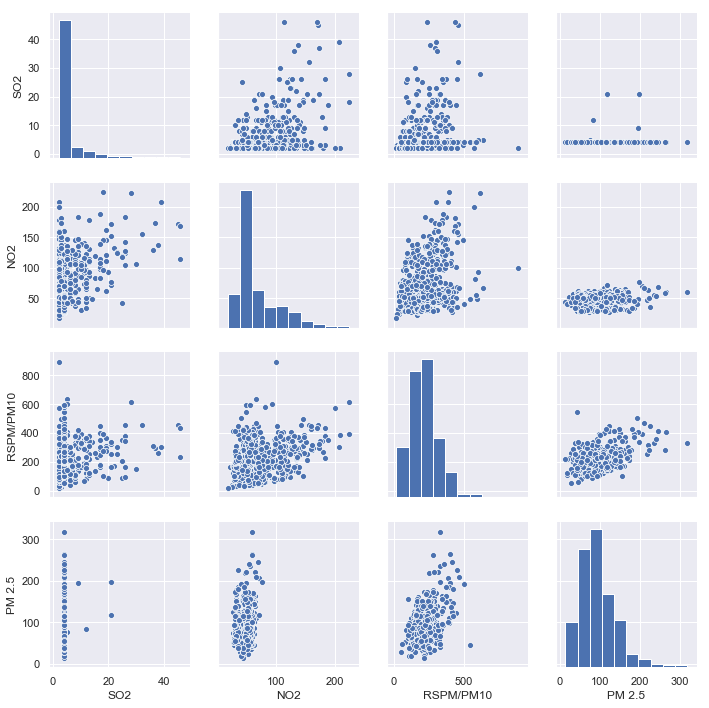

In [6]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set()
cols = ['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [7]:
a = list(df['Type of Location'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['Type of Location'] = a
df['Type of Location'].value_counts()

Residential    494
Industrial     250
Name: Type of Location, dtype: int64

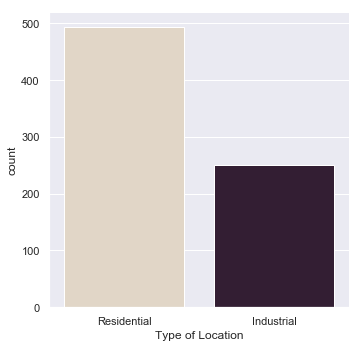

In [8]:
sns.catplot(x = "Type of Location", kind = "count", palette = "ch: 0.25", data = df)

In [9]:
df.dropna(axis=0, how='all')

,Sampling Date,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,2015-01-05,Residential,4.0,44.0,203.0,NaN
1,2015-01-08,Residential,4.0,45.0,214.0,NaN
2,2015-01-13,Residential,4.0,47.0,182.0,NaN
3,2015-01-16,Residential,4.0,43.0,204.0,78.0
4,2015-01-21,Residential,4.0,39.0,192.0,83.0
5,2015-01-27,Residential,4.0,46.0,159.0,146.0
6,2015-02-02,Residential,4.0,41.0,267.0,62.0
7,2015-02-05,Residential,4.0,50.0,235.0,112.0
8,2015-02-10,Residential,4.0,48.0,241.0,62.0
9,2015-02-13,Residential,4.0,45.0,280.0,NaN


In [10]:
df.fillna(data.mean(), inplace=True)

In [11]:
del df['Type of Location']
df.head()

,Sampling Date,SO2,NO2,RSPM/PM10,PM 2.5
0,2015-01-05,4.0,44.0,203.0,95.113208
1,2015-01-08,4.0,45.0,214.0,95.113208
2,2015-01-13,4.0,47.0,182.0,95.113208
3,2015-01-16,4.0,43.0,204.0,78.000000
4,2015-01-21,4.0,39.0,192.0,83.000000


In [12]:
df['Date'] = df['Sampling Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [13]:
from datetime import datetime
Date= []
for i in df['Date']:
    Date.append(datetime.strptime(i,'%Y-%m-%d'))
df.dtypes

Sampling Date    datetime64[ns]
SO2                     float64
NO2                     float64
RSPM/PM10               float64
PM 2.5                  float64
Date                     object
dtype: object

In [14]:
Date=pd.Series(Date)
df['Sampling Date']=pd.to_numeric(Date)

In [15]:
Re = Date.replace('�',0, regex=True)
# convert it back to numpy array
X_np = Re.values
df['Date']=X_np.astype(float)
#df.dtypes
df

,Sampling Date,SO2,NO2,RSPM/PM10,PM 2.5,Date
0,1420416000000000000,4.0,44.0,203.0,95.113208,1.420416e+18
1,1420675200000000000,4.0,45.0,214.0,95.113208,1.420675e+18
2,1421107200000000000,4.0,47.0,182.0,95.113208,1.421107e+18
3,1421366400000000000,4.0,43.0,204.0,78.000000,1.421366e+18
4,1421798400000000000,4.0,39.0,192.0,83.000000,1.421798e+18
5,1422316800000000000,4.0,46.0,159.0,146.000000,1.422317e+18
6,1422835200000000000,4.0,41.0,267.0,62.000000,1.422835e+18
7,1423094400000000000,4.0,50.0,235.0,112.000000,1.423094e+18
8,1423526400000000000,4.0,48.0,241.0,62.000000,1.423526e+18
9,1423785600000000000,4.0,45.0,280.0,95.113208,1.423786e+18


# Adding Feature

In [16]:
features = df

In [17]:
features = features.drop('Date' , axis=1)
features = features.drop('NO2' , axis=1)
features = features.drop('RSPM/PM10' , axis=1)
features = features.drop('PM 2.5' , axis=1)

In [18]:
target = df['SO2'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [21]:
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (520, 2)
y_train shape --> (520,)
X_test shape --> (224, 2)
y_test shape --> (224,)


# Regression Model: 1. Linear Regression


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lineReg.score(X_test, y_test )

1.0

In [25]:
print("Predicted values:", lineReg.predict(X_test))
y_pred = lineReg.predict(X_test)
y_pred.shape

Predicted values: [ 3.          4.          4.          4.          5.63885089  4.
  4.          3.          2.          4.          4.          4.
  6.          4.          2.          4.          4.          2.
  2.          5.          4.         13.          4.          4.
  4.          2.          4.         10.          4.          6.
  4.          4.          4.          4.          4.          4.
 17.          4.          4.          8.          2.          4.
  4.          5.63885089 38.          4.          4.         17.
  9.          4.          4.          4.          4.          5.63885089
  4.          4.         26.         13.          4.          6.
  4.         12.          4.          2.          4.          2.
  4.          3.          4.          4.          2.          4.
  2.          8.          3.          2.          4.          5.
  4.          2.          5.63885089  4.          4.          4.
  4.          4.          4.          4.          4.          3.

(224,)

In [26]:
print(" score for liner regression: ", lineReg.score(X_test, y_test))

 score for liner regression:  1.0


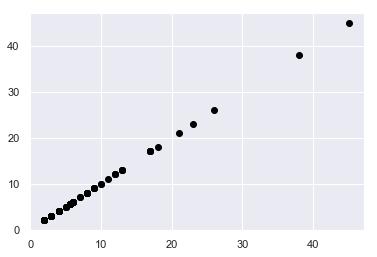

In [27]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

# 2. Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

In [29]:
a=Lasso(alpha=2)
a.fit(X_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
print("Predicted values:", a.predict(X_test))
y_pred = a.predict(X_test)
y_pred.shape

Predicted values: [ 3.12403154  4.09578268  4.21307189  4.14382886  5.64643618  4.10002205
  4.02653965  3.13462996  2.23636123  4.18551599  4.16643883  4.08589081
  6.03928495  3.99191813  2.24130716  4.21943094  4.10567454  2.29500583
  2.24201372  4.97426769  4.13464356 12.62957444  4.12051233  4.13535012
  4.18622255  2.26462369  4.19964722  9.70866854  4.10002205  6.00042406
  4.03996432  4.01594122  3.99686406  4.16361258  4.05197586  4.06752022
 16.27422838  4.02088715  4.18622255  7.86973737  2.24625309  4.04702993
  4.12899107  5.77503038 36.06205433  4.08659738  4.1614929  16.23324781
  8.67756624  4.2293228   4.18339631  4.00251656  4.23073593  5.68035113
  4.13040419  4.05197586 24.80166109 12.51935084  4.02088715  6.03999151
  4.042084   11.6853792   4.02724621  2.27592867  4.01311498  2.15157384
  4.12969763  3.20952549  4.05056274  3.99121157  2.24625309  4.02653965
  2.24554653  7.77081876  3.1247381   2.26109088  4.00816905  5.17563772
  4.07105302  2.11341952  5.69589

(224,)

In [31]:
print("Train set score : {}".format(a.score(X_train, y_train)))

Train set score : 0.9962148422848109


In [32]:
mse = np.mean((y_pred - y_test)**2)
mse

0.09507095539411688

In [33]:
a.score(X_train,y_train)

0.9962148422848109

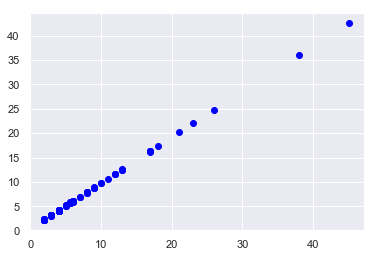

In [34]:
plt.scatter(y_test,y_pred,color='blue')
plt.show()

# 3. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
print("Coefficient of determination <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination <-- on train set: 1.0


In [38]:
y_pred = dtr.predict(X_test) 
print("Predicted values:", dtr.predict(X_test)) 

Predicted values: [ 3.          4.          4.          4.          5.63885089  4.
  4.          3.          2.          4.          4.          4.
  6.          4.          2.          4.          4.          2.
  2.          5.          4.         13.          4.          4.
  4.          2.          4.         10.          4.          6.
  4.          4.          4.          4.          4.          4.
 17.          4.          4.          8.          2.          4.
  4.          5.63885089 37.          4.          4.         17.
  9.          4.          4.          4.          4.          5.63885089
  4.          4.         26.         13.          4.          6.
  4.         12.          4.          2.          4.          2.
  4.          3.          4.          4.          2.          4.
  2.          8.          3.          2.          4.          5.
  4.          2.          5.63885089  4.          4.          4.
  4.          4.          4.          4.          4.          3.